In [1]:
#used to supress display of warnings
import warnings 
warnings.filterwarnings('ignore')

In [6]:
#importing libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [7]:
#importing dataset
data = pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv')
data.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [4]:
#dropping "Unnamed: 0" column
data = data.drop(['Unnamed: 0'],axis=1)

In [5]:
#checking shape of the data
data.shape

(425, 10)

In [6]:
#checking data types 
data.dtypes

Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

In [7]:
#checking for null values
#no null values found
data.isna().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [8]:
#checking for unique values
#number of unique values are shown against their respective column names
data.nunique()

Data                        287
Countries                     3
Local                        12
Industry Sector               3
Accident Level                5
Potential Accident Level      6
Genre                         2
Employee or Third Party       3
Critical Risk                33
Description                 411
dtype: int64

In [9]:
#Using describe method to get basic statistical insight from the data
data.describe()

Data   Countries     Local Industry Sector  \
count                   425         425       425             425   
unique                  287           3        12               3   
top     2017-02-08 00:00:00  Country_01  Local_03          Mining   
freq                      6         251        90             241   

       Accident Level Potential Accident Level Genre Employee or Third Party  \
count             425                      425   425                     425   
unique              5                        6     2                       3   
top                 I                       IV  Male             Third Party   
freq              316                      143   403                     189   

       Critical Risk                                        Description  
count            425                                                425  
unique            33                                                411  
top           Others  On 02/03/17 during the soil sampling in the re...  
freq             232                                                  3

In [10]:
from datetime import datetime
data.Data = data.Data.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [11]:
#Splitting the "Data" column into "year", "month", "day", "weekday" and "WeekofYear"
def add_feature(df):
    df['year']      = df['Data'].dt.year
    df['month']     = df['Data'].dt.month
    df['day']       = df['Data'].dt.day
    data['Weekday'] = df['Data'].dt.day_name()
    data['WeekofYear']=df['Data'].dt.weekofyear
    
add_feature(data)

data.head()

Data   Countries     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

In [12]:
#removing "data" columns from the data
data = data.drop(['Data'],axis=1)

------------------------------------------------------------
Value Counts for `Country` label
------------------------------------------------------------
Country_01 count: 251 i.e. 59.0%
Country_02 count: 130 i.e. 31.0%
Country_03 count: 44 i.e. 10.0%
------------------------------------------------------------
Distributon of `Country` label
------------------------------------------------------------


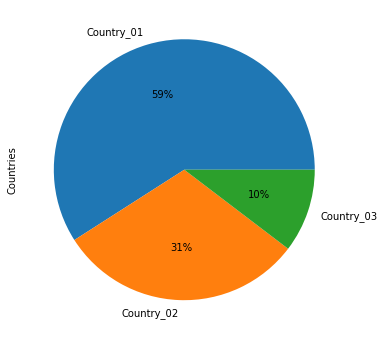

In [13]:
print('--'*30); print('Value Counts for `Country` label'); print('--'*30)

total_row_cnt = data.shape[0]
country_01_cnt = data[data.Countries == 'Country_01'].shape[0]
country_02_cnt = data[data.Countries == 'Country_02'].shape[0]
country_03_cnt = data[data.Countries == 'Country_03'].shape[0]

print(f'Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%')
print(f'Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%')
print(f'Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Country` label'); print('--'*30)
_ = data['Countries'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))

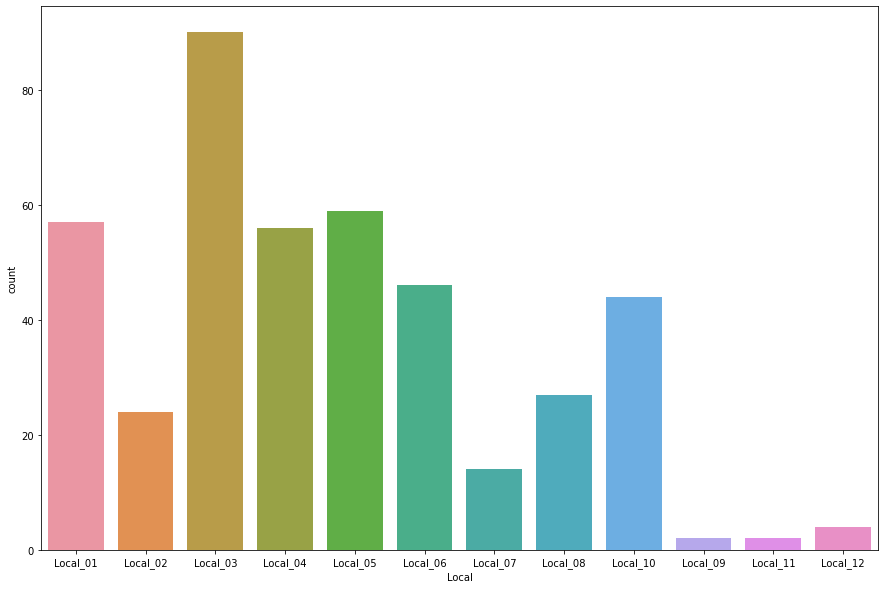

In [14]:
#Using countplot to visually represent the counts of observations in each city
plt.figure(figsize=(15,10))
sb.countplot(data.Local)
plt.show()

<AxesSubplot:xlabel='Accident Level', ylabel='count'>

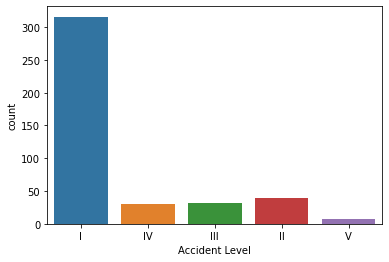

In [15]:
#Using countplot to visually represent the counts of observations in each "Accident Level"
sb.countplot(data['Accident Level'])

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

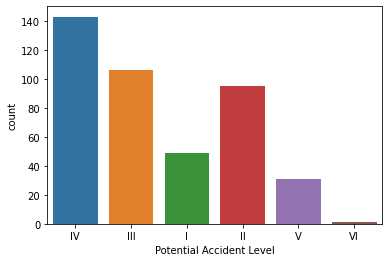

In [16]:
#Using countplot to visually represent the counts of observations in each "Potential Accident Level"
sb.countplot(data['Potential Accident Level'])

<AxesSubplot:xlabel='Genre', ylabel='count'>

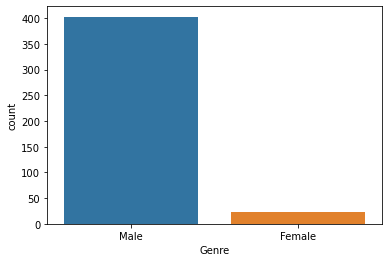

In [17]:
#Using countplot to visually represent the counts of observations in each Gender
sb.countplot(data['Genre'])

<AxesSubplot:xlabel='Employee or Third Party', ylabel='count'>

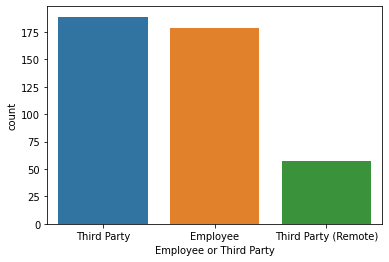

In [18]:
#Using countplot to visually represent the counts of observations in each country
sb.countplot(data['Employee or Third Party'])

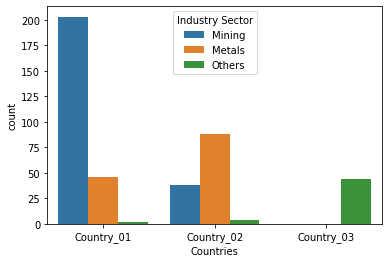

In [19]:
#Using countplot to visually represent the counts of observations in each country with respect to the "Industry sector"
sb.countplot(data['Countries'],hue=data['Industry Sector']);

<AxesSubplot:xlabel='Accident Level', ylabel='count'>

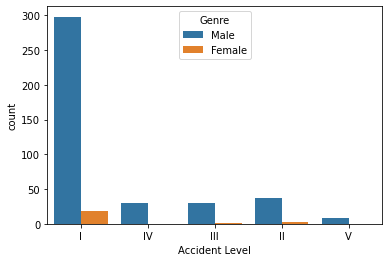

In [20]:
#Using countplot to visually represent the counts of observations in each "Accident Level" with respect to gender
sb.countplot(data['Accident Level'],hue=data['Genre'])

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

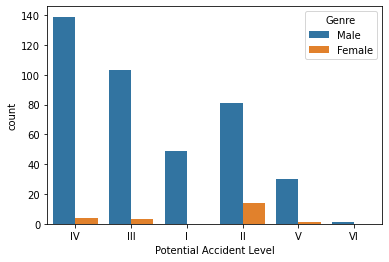

In [21]:
#Using countplot to visually represent the counts of observations in each "Potential Accident Level" with respect to gender 
sb.countplot(data['Potential Accident Level'],hue=data['Genre'])

In [22]:
data.columns

Index(['Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description', 'year', 'month', 'day', 'Weekday',
       'WeekofYear'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='count'>

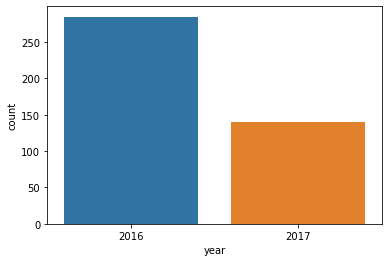

In [23]:
#Using countplot to visually represent the counts of observations in each year
sb.countplot(data['year'])

<AxesSubplot:xlabel='month', ylabel='count'>

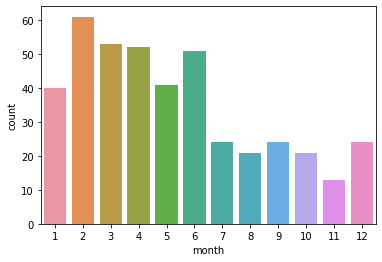

In [24]:
#Using countplot to visually represent the counts of observations in each month
sb.countplot(data['month'])

<AxesSubplot:xlabel='day', ylabel='count'>

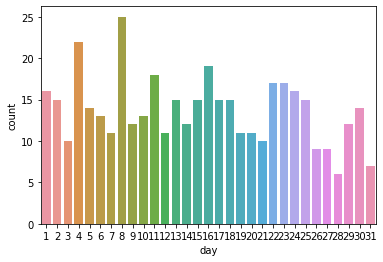

In [25]:
#Using countplot to visually represent the counts of observations in each day of the month
sb.countplot(data['day'])

In [3]:
#importing natural language toolkit and other relevant libraries
import nltk
from string import punctuation 
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [4]:
wordNet = WordNetLemmatizer()
stopwords = stopwords.words('english') + list(punctuation)

In [28]:
#defining "preprocess_text"
def preprocess_text(df, column_name=''):

  # Select only alphabets
  df[column_name] = df[column_name].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
    
  # Convert text to lowercase
  df[column_name] = df[column_name].apply(lambda x: x.lower())  

  # Strip unwanted spaces
  df[column_name] = df[column_name].apply(lambda x: x.strip())    

  # Remove stopwords
  df[column_name] = df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
    
  # Lemmatization
  df[column_name] = df[column_name].apply(lambda x: wordNet.lemmatize(x))

  # Replace empty strings with Null
  df[column_name].replace('', np.nan, inplace = True)

  # Drop Null values
  df = df.dropna()

  return df

In [29]:
#checking the first 5 rows of the data after "preprocess_text"
df = preprocess_text(data, column_name='Description')
df.head()

Countries     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   
1  Country_02  Local_02          Mining              I   
2  Country_01  Local_03          Mining              I   
3  Country_01  Local_04          Mining              I   
4  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  year  month  day  \
0  removing drill rod jumbo maintenance superviso...  2016      1    1   
1  activation sodium sulphide pump piping uncoupl...  2016      1    2   
2  sub station milpo located level collaborator e...  2016      1    6   
3  approximately nv cx ob personnel begins task u...  2016      1    8   
4  approximately circumstances mechanics anthony ...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

In [30]:
from wordcloud import WordCloud

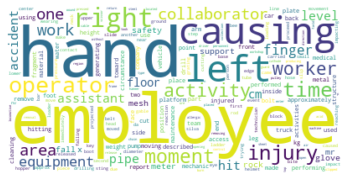

In [31]:
text = " ".join(i for i in df.Description)

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
all_words = list()
for i in df['Description']:
    for j in i.split():
        all_words.append(j)

In [33]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 3007


In [34]:
index_dict = dict()
count = 1
for word in set(all_words):
    index_dict[word] = count
    count += 1

In [35]:
index_dict

{'maribondos': 1,
 'warps': 2,
 'reflux': 3,
 'tirfor': 4,
 'trays': 5,
 'forward': 6,
 'deviate': 7,
 'rock': 8,
 'alert': 9,
 'fact': 10,
 'rebound': 11,
 'pen': 12,
 'filled': 13,
 'mounted': 14,
 'proximal': 15,
 'electrowelded': 16,
 'concussion': 17,
 'realize': 18,
 'activates': 19,
 'subsequently': 20,
 'alex': 21,
 'partners': 22,
 'coat': 23,
 'unscrew': 24,
 'adjusting': 25,
 'company': 26,
 'delivery': 27,
 'scalp': 28,
 'vegetation': 29,
 'atricion': 30,
 'machete': 31,
 'elismar': 32,
 'jackleg': 33,
 'notes': 34,
 'gave': 35,
 'drive': 36,
 'melt': 37,
 'ankle': 38,
 'recently': 39,
 'jaw': 40,
 'returning': 41,
 'block': 42,
 'worn': 43,
 'santos': 44,
 'stands': 45,
 'wellfield': 46,
 'paracatu': 47,
 'stage': 48,
 'choco': 49,
 'usual': 50,
 'bank': 51,
 'atenuz': 52,
 'diagonal': 53,
 'gilv': 54,
 'lateral': 55,
 'night': 56,
 'registered': 57,
 'overturning': 58,
 'amg': 59,
 'antiallergic': 60,
 'demister': 61,
 'use': 62,
 'ingots': 63,
 'front': 64,
 'stitches': 

In [36]:
embeddings_index = {}
f = open('glove.6B.300d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [37]:
embeddings_index

{'the': array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
         2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
        -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
         2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
        -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
        -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
         9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
        -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
         1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
         2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
         1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
         2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
        -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
        -4.4640e-01,  1.7197e-01,  4.6246e-0

In [38]:
data_list = list()
for i in df['Description']:
    sentence = np.zeros(300)
    count = 0
    for w in i:
        try:
            sentence += embeddings_index[w]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)

In [39]:
data_list

[array([-2.60350482e-01,  4.11132532e-02, -2.46309601e-01, -6.72329381e-02,
        -5.73882246e-01,  1.28851006e-02,  4.68294142e-03,  2.23075589e-01,
        -3.36758110e-01, -1.17140418e+00,  8.17977395e-02,  9.87533668e-02,
        -3.49127955e-01,  6.84603654e-02, -4.76475605e-02, -1.48386479e-01,
        -2.81439689e-01,  3.52822179e-01,  1.90155425e-01, -5.27519683e-02,
        -9.08812200e-02, -1.21061020e-01, -6.37191901e-02,  9.14484923e-02,
        -7.36791746e-02,  1.71483034e-01,  1.59343403e-01,  1.88763971e-01,
         3.50777418e-01, -3.92885007e-01, -1.14723432e-01,  3.71763033e-01,
        -2.51621561e-01, -1.32091508e-01, -7.44935860e-01,  2.05904642e-02,
         3.29213543e-01, -4.78887215e-01, -2.02512054e-01,  1.62083467e-01,
        -1.38283926e-01,  5.34709388e-02, -5.46560163e-01,  5.85765410e-01,
        -2.60949125e-01, -2.74125014e-01,  1.91820524e-01, -9.25092636e-02,
         5.67622204e-02,  5.24608281e-02,  6.17137999e-02,  1.81222693e-01,
        -1.2

In [40]:
df['Accident Level'].unique()

array(['I', 'IV', 'III', 'II', 'V'], dtype=object)

In [41]:
dictionary = {'I':1, 'IV':4, 'III':3, 'II':2, 'V':5}
df['Accident Level'] = df['Accident Level'].map(dictionary)
df['Accident Level'].unique()

array([1, 4, 3, 2, 5], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(data_list), df['Accident Level'].values, test_size=0.15, random_state=0,stratify=df['Accident Level'].values)

In [43]:
df['Accident Level'].value_counts()

1    316
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64

# Machine Learning

In [44]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [45]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fit the model using the train data

    pred_test = model.predict(X_test)     # model predictions on the test data

    score = accuracy_score(y_test, pred_test)  # accuracy on the test data
    recall = recall_score(y_test, pred_test,average='weighted')     # calculate recall
    precision = precision_score(y_test, pred_test,average='weighted')  # calculate precision
    f_1_score =  f1_score(y_test, pred_test,average='weighted')   # calculate f1 score
    
    
    return score, recall, precision, f_1_score  # return all the metrics

In [46]:
#All model define
lr = LogisticRegression(solver='liblinear')        # Create a Logistic Regression model object 
knn = KNeighborsClassifier()                         # Create a KNN model object 
nb = GaussianNB()                                    # Create a Naive Bayes' model object 
svm = SVC()  # Create an SVM model object 
rf = RandomForestClassifier(random_state=1, n_estimators=10)   # specifying the n_estimators to silence a future warning

In [47]:
result = {}   # Create an empty dictionary to later use to store metrics of each of the models


# putting all 4 models in a for loop and appending the results of each of the models to the result dictionary
for model, name  in list(zip([lr, knn, nb, svm,rf], ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM','Random forest'])):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)
    
result1 = pd.DataFrame(np.array(list(result.values()))[:,0:5],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Accuracy','Recall','Precision','F1 Score'], # name the columns appropriatly
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1

Accuracy    Recall  Precision  F1 Score
Model                                                       
Logistic Regression  0.750000  0.750000   0.562500  0.642857
KNN                  0.718750  0.718750   0.556452  0.627273
Naive Bayes          0.359375  0.359375   0.636604  0.427946
SVM                  0.750000  0.750000   0.562500  0.642857
Random forest        0.750000  0.750000   0.562500  0.642857

# Lstm

In [48]:
df['Accident Level']

0      1
1      1
2      1
3      1
4      4
      ..
420    1
421    1
422    1
423    1
424    1
Name: Accident Level, Length: 425, dtype: int64

In [5]:
# importing tokenizer and pad sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [50]:
vocabSize = 3007
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(df['Description'].values)
X = tokenizer.texts_to_sequences(df['Description'].values)
X = pad_sequences(X)

In [51]:
# creating lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 95, 128)           384896    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 95, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 5)                 985       
Total params: 640,681
Trainable params: 640,681
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
from sklearn.model_selection import train_test_split

#one hot encoding on target columns
Y = pd.get_dummies(df['Accident Level']).values
#spliting data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42,stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(361, 95) (361, 5)
(64, 95) (64, 5)


In [53]:
# training 
batch_size = 32
model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 2)

Epoch 1/20
12/12 - 6s - loss: 1.3136 - accuracy: 0.6620
Epoch 2/20
12/12 - 3s - loss: 0.9613 - accuracy: 0.7424
Epoch 3/20
12/12 - 3s - loss: 0.8928 - accuracy: 0.7424
Epoch 4/20
12/12 - 3s - loss: 0.8575 - accuracy: 0.7424
Epoch 5/20
12/12 - 3s - loss: 0.7419 - accuracy: 0.7479
Epoch 6/20
12/12 - 3s - loss: 0.5881 - accuracy: 0.7756
Epoch 7/20
12/12 - 3s - loss: 0.4608 - accuracy: 0.7839
Epoch 8/20
12/12 - 3s - loss: 0.3781 - accuracy: 0.8726
Epoch 9/20
12/12 - 3s - loss: 0.3107 - accuracy: 0.8809
Epoch 10/20
12/12 - 3s - loss: 0.2598 - accuracy: 0.9224
Epoch 11/20
12/12 - 3s - loss: 0.2311 - accuracy: 0.9391
Epoch 12/20
12/12 - 3s - loss: 0.2135 - accuracy: 0.9058
Epoch 13/20
12/12 - 3s - loss: 0.1873 - accuracy: 0.9501
Epoch 14/20
12/12 - 3s - loss: 0.1385 - accuracy: 0.9668
Epoch 15/20
12/12 - 3s - loss: 0.1152 - accuracy: 0.9640
Epoch 16/20
12/12 - 3s - loss: 0.0777 - accuracy: 0.9723
Epoch 17/20
12/12 - 3s - loss: 0.0809 - accuracy: 0.9668
Epoch 18/20
12/12 - 3s - loss: 0.0943 - 

In [54]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

2/2 - 0s - loss: 1.7191 - accuracy: 0.6406
score: 1.72
acc: 0.64


# Final Model

In [6]:
#importing libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv')
data.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [57]:
data = data.drop(['Unnamed: 0'],axis=1)

In [58]:
from datetime import datetime
data.Data = data.Data.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [59]:
#Splitting the "Data" column into "year", "month", "day", "weekday" and "WeekofYear"
def add_feature(df):
    df['year']      = df['Data'].dt.year
    df['month']     = df['Data'].dt.month
    df['day']       = df['Data'].dt.day
    data['Weekday'] = df['Data'].dt.day_name()
    data['WeekofYear']=df['Data'].dt.weekofyear
    
add_feature(data)

data.head()

Data   Countries     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

In [60]:
#removing "data" columns from the data
data = data.drop(['Data'],axis=1)

In [7]:
#importing natural language toolkit and other relevant libraries
import nltk
from string import punctuation 
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [31]:
wordNet = WordNetLemmatizer()
stopwords = stopwords.words('english') + list(punctuation)

In [63]:
#defining "preprocess_text"
def preprocess_text(df, column_name=''):

  # Select only alphabets
  df[column_name] = df[column_name].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
    
  # Convert text to lowercase
  df[column_name] = df[column_name].apply(lambda x: x.lower())  

  # Strip unwanted spaces
  df[column_name] = df[column_name].apply(lambda x: x.strip())    

  # Remove stopwords
  df[column_name] = df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
    
  # Lemmatization
  df[column_name] = df[column_name].apply(lambda x: wordNet.lemmatize(x))

  # Replace empty strings with Null
  df[column_name].replace('', np.nan, inplace = True)

  # Drop Null values
  df = df.dropna()

  return df

In [64]:
#checking the first 5 rows of the data after "preprocess_text"
df = preprocess_text(data, column_name='Description')


In [65]:
dictionary = {'I':1, 'IV':4, 'III':3, 'II':2, 'V':5}
df['Accident Level'] = df['Accident Level'].map(dictionary)
df['Accident Level'].unique()

array([1, 4, 3, 2, 5], dtype=int64)

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM,BatchNormalization, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [67]:
max_features = 10000
maxlen = 25
embedding_size = 300

In [78]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df['Description']))
X = tokenizer.texts_to_sequences(df['Description'])
print("Number of Samples:", len(X))
print(X[0])
X = pad_sequences(X, maxlen = maxlen)

Number of Samples: 425
[159, 75, 199, 315, 61, 287, 222, 700, 24, 851, 1639, 1640, 172, 1112, 62, 701, 11, 65, 75, 13, 583, 173, 98, 1641, 172, 12, 98, 145, 76, 24, 1642, 357, 62, 85, 98, 316, 315]


In [69]:
#one hot encoding on target columns
Y = pd.get_dummies(df['Accident Level']).values

In [70]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

3008


In [71]:
EMBEDDING_FILE = 'glove.6B.300d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE,encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 300))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [72]:
len(embeddings.values())

400000

In [77]:
type(X)

list

In [79]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix],input_length = X.shape[1]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(5, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 300)           902400    
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           439296    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1638656   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [80]:
batch_size = 100
epochs = 25
history = model.fit(X, Y, batch_size=batch_size, epochs=epochs, validation_split=0.4)

Epoch 1/25
3/3 [==============================] - 4s 600ms/step - loss: 2.1423 - accuracy: 0.1941 - val_loss: 1.6444 - val_accuracy: 0.0588
Epoch 2/25
3/3 [==============================] - 0s 154ms/step - loss: 1.8955 - accuracy: 0.2596 - val_loss: 1.6537 - val_accuracy: 0.0706
Epoch 3/25
3/3 [==============================] - 0s 163ms/step - loss: 1.7550 - accuracy: 0.2705 - val_loss: 1.6445 - val_accuracy: 0.0941
Epoch 4/25
3/3 [==============================] - 0s 154ms/step - loss: 1.6509 - accuracy: 0.3381 - val_loss: 1.6334 - val_accuracy: 0.1529
Epoch 5/25
3/3 [==============================] - 0s 167ms/step - loss: 1.6303 - accuracy: 0.3131 - val_loss: 1.6230 - val_accuracy: 0.1882
Epoch 6/25
3/3 [==============================] - 0s 152ms/step - loss: 1.5623 - accuracy: 0.3616 - val_loss: 1.5962 - val_accuracy: 0.2176
Epoch 7/25
3/3 [==============================] - 1s 189ms/step - loss: 1.4725 - accuracy: 0.3916 - val_loss: 1.5492 - val_accuracy: 0.4529
Epoch 8/25
3/3 [====

In [81]:
history_df = pd.DataFrame(history.history)
print('training acc.:',history.history['accuracy'][-1],'\n','test acc.:', (history.history['val_accuracy'])[-1])

training acc.: 0.7803921699523926 
 test acc.: 0.7235293984413147


In [82]:
model.save('classifier.h5')
model.save_weights('classifier_weights.h5')

# GUI

In [2]:
import tkinter as tk
from tkinter import ttk
import re

In [3]:
#window
win = tk.Tk()
win.title('GUI - safety risk')

#label show step 1 file name on GUI
Name=ttk.Label(win,text="File Name")
Name.grid(row=0,column=0,sticky=tk.W)

#entry box for getting data name and storing in Name_var
Name_var = tk.StringVar()
Name_entrybox = ttk.Entry(win,width=20,textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)

#function for importing data
def Import_Data():
    global DB
    DF_Name = Name_var.get()
    if len(DF_Name)==0:
        confirm="File Not Given"
    DB_extension = re.findall("\..*",DF_Name)
    if DB_extension==['.xlsx']:
        DB=pd.read_excel(DF_Name)
        confirm="Done"
    elif DB_extension==['.csv']:
        DB=pd.read_csv(DF_Name)
        confirm="Done"
    #entry box showing import action on data e.g File not found or Done    
    Confirm_entrybox = ttk.Entry(win,width=20)
    Confirm_entrybox.grid(row=0,column=3)
    Confirm_entrybox.insert(1,str(confirm))    

#button for import data action
Import_Data_Button=ttk.Button(win,text="Import Data",command=Import_Data)
Import_Data_Button.grid(row=0,column=2)

#label for showing Step 2 target column on GUI
Target = ttk.Label(win,text="Target Column")
Target.grid(row=1,column=0,sticky=tk.W)

#entry box which get target column name and store in target_var
Target_var = tk.StringVar()
Target_entrybox = ttk.Entry(win,width=20,textvariable=Target_var)
Target_entrybox.grid(row=1,column=1)

#function for getting target data 
def Target_Data():
    global DB, Target_Name
    Target_Name= Target_var.get()
    
    Column_name=DB.columns
    Column_name
    found=0
    
    for i in range(len(Column_name)):
        if Column_name[i]==Target_Name:
            confirm="Found"
            #y = DB[Target_Name]
           
            
        else:
            confirm="Not Found"
        #entry box show result target column results Found or Not found    
        Confirm_entrybox = ttk.Entry(win,width=20)
        Confirm_entrybox.grid(row=1,column=3)
        Confirm_entrybox.insert(1,str(confirm))
                    

#button getting target column
Target_Button = ttk.Button(win,text="Import Target",command=Target_Data)
Target_Button.grid(row=1,column=2)

#processing
processing=ttk.Label(win,text="processing Data for Models :-")
processing.grid(row=2,column=0,sticky=tk.W)

#defining "preprocess_text"
def preprocess_text():
    global DB
    DB['Description'] = DB['Description'].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
    DB['Description'] = DB['Description'].apply(lambda x: x.lower())  
    DB['Description'] = DB['Description'].apply(lambda x: x.strip())    
    DB['Description'] = DB['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
    DB['Description'] = DB['Description'].apply(lambda x: wordNet.lemmatize(x))
    DB['Description'].replace('', np.nan, inplace = True)
    DB = DB.dropna()
    dictionary = {'I':1, 'IV':4, 'III':3, 'II':2, 'V':5}
    DB['Accident Level'] = DB['Accident Level'].map(dictionary)
    DB = DB.drop(['Data','Unnamed: 0'],axis=1)
    confirm="Done"
    Confirm_entrybox = ttk.Entry(win,width=20)
    Confirm_entrybox.grid(row=3,column=2)
    Confirm_entrybox.insert(1,str(confirm))
    return DB
    
    
#button for preprocessing
preprocessing_Button = ttk.Button(win,text="preprocessing",command=preprocess_text)
preprocessing_Button.grid(row=3,column=1)

def Get():
    global DB,X,Y,num_words,embedding_size,embedding_matrix
    
    max_features = 10000
    maxlen = 25
    embedding_size = 300
    
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(DB['Description']))
    X = tokenizer.texts_to_sequences(DB['Description'])
    X = pad_sequences(X, maxlen = maxlen)
    
    Y = pd.get_dummies(DB['Accident Level']).values
    
    num_words = len(tokenizer.word_index) + 1
    
    EMBEDDING_FILE = 'glove.6B.300d.txt'
    embeddings = {}
    for o in open(EMBEDDING_FILE,encoding="utf8"):
        word = o.split(" ")[0]
        embd = o.split(" ")[1:]
        embd = np.asarray(embd, dtype='float32')
        embeddings[word] = embd
    embedding_matrix = np.zeros((num_words, 300))
    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    confirm="Done"
    Confirm_entrybox = ttk.Entry(win,width=20)
    Confirm_entrybox.grid(row=4,column=2)
    Confirm_entrybox.insert(1,str(confirm))        

EMBEDDING_Button = ttk.Button(win,text="Get:embedding",command=Get)
EMBEDDING_Button.grid(row=4,column=1)

#final model
final_model=ttk.Label(win,text="final model :- Bidirectional LSTM")
final_model.grid(row=5,column=0,sticky=tk.W)

def lstm_model():
    global model,X,Y,num_words,embedding_matrix,embedding_size
    
    model = Sequential()
    model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix],input_length = X.shape[1]))
    model.add(Bidirectional(LSTM(128, return_sequences = True)))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(16, activation="relu"))
    model.add(Dropout(0.2))
    #model.add(Flatten())
    model.add(Dense(5, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    batch_size = 100
    epochs = 25
    history = model.fit(X, Y, batch_size=batch_size, epochs=epochs, validation_split=0.4)
    history_df = pd.DataFrame(history.history)
    
    accuracy_entrybox = ttk.Entry(win,width=20)
    accuracy_entrybox.grid(row=6,column=2)
    accuracy_entrybox.insert(1,str(history.history['accuracy'][-1]))  
    
    Val_accuracy_entrybox = ttk.Entry(win,width=20)
    Val_accuracy_entrybox.grid(row=6,column=3)
    Val_accuracy_entrybox.insert(1,str(history.history['val_accuracy'][-1])) 
    
    
    

#button for training model    
final_model_Button = ttk.Button(win,text="Train",command=lstm_model) 
final_model_Button.grid(row=6,column=1)


                                 
def pkl():
    global model
    model.save('classifier.h5')
    model.save_weights('classifier_weights.h5')
    confirm="model saved"
    model_entrybox = ttk.Entry(win,width=20)
    model_entrybox.grid(row=7,column=2)
    model_entrybox.insert(1,str(confirm)) 
    

#lable which show Pickel on GUI 
final_model_pkl = ttk.Button(win,text="Pickle",command=pkl)
final_model_pkl.grid(row=7,column=1)

#prediction
predictions=ttk.Label(win,text="Predictions of Accident Level")
predictions.grid(row=8,column=0,sticky=tk.W)


Description_var = tk.StringVar()
Description_entrybox = ttk.Entry(win,width=20,textvariable=Description_var)
Description_entrybox.grid(row=9,column=0)  

def pred():
    global DB,model,sentence
    sentence = Description_var.get()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    sentence=sentence.lower()
    sentence =sentence.strip()
    sentence =' '.join([word for word in sentence.split() if word not in stopwords])
    sentence=wordNet.lemmatize(sentence)
    
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(list(DB['Description']))
    sentence = tokenizer.texts_to_sequences(sentence)
    sentence = pad_sequences(sentence, maxlen = 25)
    
    result = model.predict(sentence)
    predicted_index = np.argmax(result[0])
    dictionary = {0:'I', 3:'IV', 2:'III', 1:'II', 4:'V'}
    predicted = dictionary[predicted_index]
    predicted
    
    confirm= 'Accident Level :-> ' + predicted
    Confirm_entrybox = ttk.Entry(win,width=20)
    Confirm_entrybox.grid(row=9,column=2)
    Confirm_entrybox.insert(1,str(confirm))  
    
    
                                 
predictions_Button = ttk.Button(win,text="Predict",command=pred)
predictions_Button.grid(row=9,column=1)

#for continous GUI running
win.mainloop()